# LAB 2 - MULTIVARIATE REGRESSION, NON-PARAMETRIC MODELS AND CROSS-VALIDATION

## Step 1: Get the Data
We’ll use the built-in Diabetes dataset from Scikit-Learn.  
This dataset contains ten baseline variables (age, sex, BMI, blood pressure, and six blood serum measurements) for 442 patients, along with a target variable: a quantitative measure of disease progression one year after baseline. 

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

# Load the Diabetes dataset
diabetes = load_diabetes()

# Convert to Dataframe
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

print("Diabetes Dataset")
df.head()

Diabetes Dataset


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### Talking Points:

1. **Built-in Dataset:** No external files or calling in an API, can be loaded instantly for reproducible results.
2. **Features + Target:** Ten input features predict a single continuous target (disease progression).
3. **DataFrame Conversion:** Converting the data to pandas dataframe allows direct use in EDA, statistical tests, or ML modeling.

## Step 2: Frame the Problem
We are predicting the **disease progression** of diabetes patients **one year after baseline** using ten baseline physiological variables.

### Problem Type
This is a **supervised machine learning** problem with a **continuous target variable** — the disease progression score — so it is a **regression problem**.

### Input (Independent Variables)
The features include:
- Age  
- Sex  
- Body mass index (bmi)  
- Average blood pressure (bp)  
- Six blood serum measurements (s1 to s6)

These represent each patient's health metrics at baseline.

### Output (Dependent Variable)
The target, `diabetes.target`, measures **how much the disease has progressed** after one year.  
It’s a numeric score roughly between **25 and 346**.

### Objective
Build a model that can **predict future disease progression** from baseline measurements.  
This could help doctors or researchers:
- Identify high-risk patients early,  
- Personalize treatment plans, and  
- Understand which health indicators most influence progression.

### Learning Task Summary
| Category | Description |
|-----------|--------------|
| **Type** | Supervised Regression |
| **Target Variable** | Disease progression after one year |
| **Goal** | Minimize prediction error between model output and true progression values |
| **Evaluation Metrics** | Mean Squared Error (MSE), Mean Absolute Error (MAE), R² Score |

### Talking Points

1. **Problem Nature:** It’s a regression task, not classification. Here, we’re predicting a continuous disease progression score.
2. **Business Relevance:** Helps identify early intervention opportunities by forecasting progression based on current health markers.
3. **Modeling Goal:** Build and evaluate a predictive model that minimizes prediction error (e.g., RMSE or MAE).

# Step 3: Explore the Data

Exploratory Data Analysis helps us understand:

1. **Data Shape and Structure** – Number of rows, columns, and datatypes  
2. **Statistical Summary** – Mean, median, standard deviation, etc.  
3. **Missing Values** – Verify data completeness  
4. **Feature Distributions** – Spot skewness or outliers  
5. **Relationships** – Correlation between features and the target (`disease progression`)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

# Load the Diabetes dataset
diabetes = load_diabetes()

# Convert to Dataframe
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

print("Diabetes Dataset")
df.head()

Diabetes Dataset


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### Statistical Summary

In [2]:
# Statistical Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


### Insights:
Target has a wide range (25-346), including diverse disease outcomes.

### Missing Value Check

In [3]:
# Check for missing values
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

### Insights:

The diabetes dataset from scikit-learn is clean. There are no missing values.

### Visualization

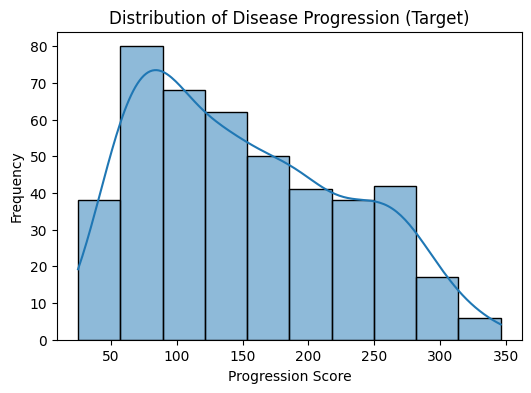

In [4]:
# Distribution of Target Variable
plt.figure(figsize=(6,4))
sns.histplot(df['target'], kde=True)
plt.title('Distribution of Disease Progression (Target)')
plt.xlabel('Progression Score')
plt.ylabel('Frequency')
plt.show()


### Insights:

The model shows it's approximately normally distributed. It's also slightly skewed on right side.
The model is suitable for linear regression.

### Scatter Plot Visualization

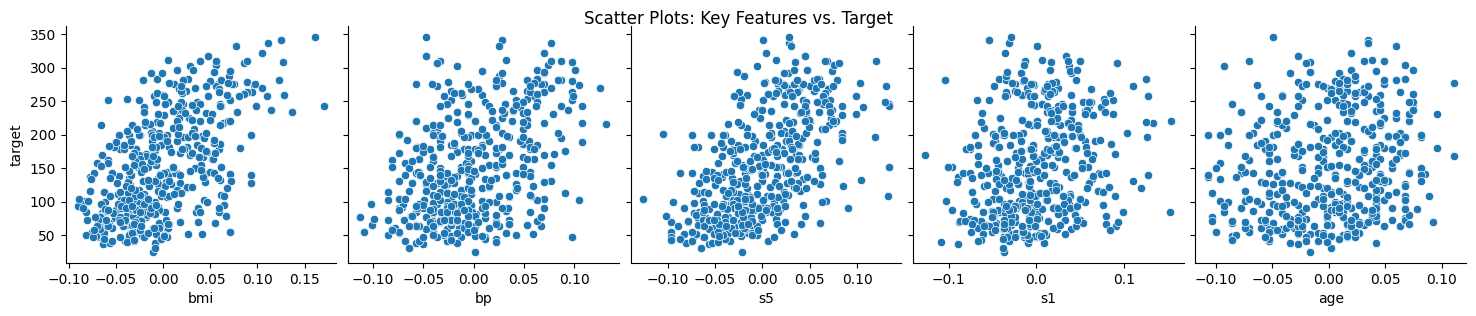

In [8]:
# Scatter plots of relationship
selected_features = ["bmi", "bp", "s5", "s1", "age"]
sns.pairplot(df, x_vars=selected_features, y_vars=["target"], kind="scatter", height=3)
plt.suptitle("Scatter Plots: Key Features vs. Target", y=1.02)
plt.show()


### Insights: 
1. BMI shows the strongest positive linear trend with disease progression.
2. S5 also shows a notable positive correlation.
3. S1 and BP exhibit moderate relationships.
4. Age appears less correlated visually.

### Correlation with Target

In [6]:
# Correlation Matrix
corr = df.corr()

# Sort by correlation with target
corr_target = corr['target'].sort_values(ascending=False)
print("Correlation of features with target: ")
print(corr_target)

Correlation of features with target: 
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


### Insights:

1. Top positive correlations: bmi, s5, and bp.
2. Negative correlations: s3 and s2 (possibly protective or inverse effects).
3. BMI is the most influential predictor: consistent with medical expectations linking obesity to diabetes severity.
4. Features are moderately correlated, so multicollinearity may need consideration before regression.

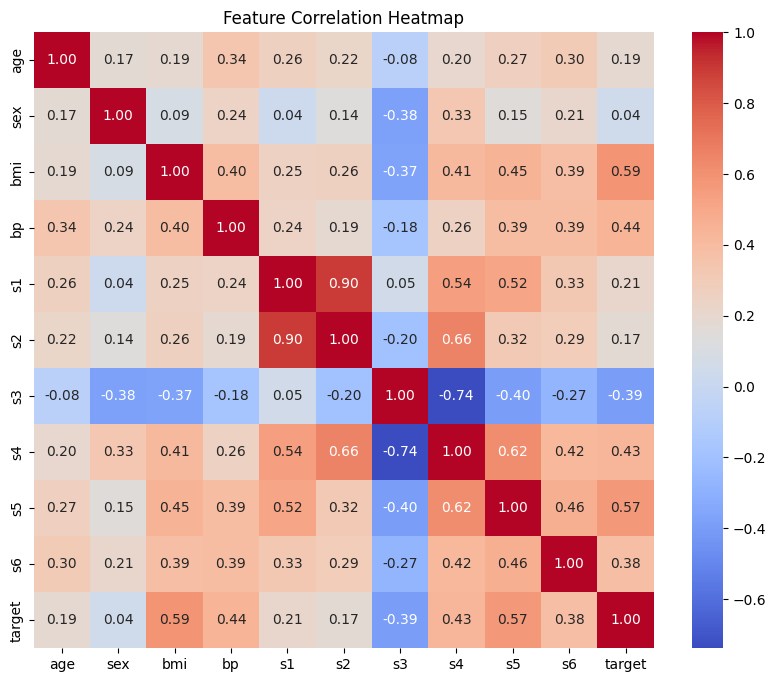

In [7]:
# Heatmap Visualization
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


### Talking Points

1. **Feature Relevance:** BMI and blood pressure are biologically plausible predictors of diabetes progression.
2. **Data Quality:** No missing or categorical data simplifies preprocessing.
3. **Model Readiness:** Linear relationships suggest regression models can perform well initially.

# Step 4: Clean the Data

Before building models, it’s critical to ensure the dataset is clean, consistent, and ready for analysis.

### 1. Check for Missing Values
We verify if any cells contain null or NaN values that could affect statistical calculations or model training.

### 2. Detect Outliers or Invalid Entries
Extreme values can distort regression models, but standardized datasets usually limit this risk.

### 3. Feature Scaling
The Scikit-Learn Diabetes dataset is already standardized (mean ≈ 0, std ≈ 1), so no further scaling is necessary before model training.

### Summary of Findings
- **No missing data**
- **No categorical variables requiring encoding**
- **No obvious outliers due to prior normalization**
- **Dataset ready for regression modeling**


### Missing Value Check

In [13]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


### Duplicate Row Check

In [16]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Duplicate rows:\n", duplicate_rows)

Duplicate rows:
 0


### Data Range Check

In [17]:
# Check Data ranges
df.describe().T[['mean', 'std', 'min', 'max']]

,mean,std,min,max
age,-2.511817e-19,0.047619,-0.107226,0.110727
sex,1.230790e-17,0.047619,-0.044642,0.050680
bmi,-2.245564e-16,0.047619,-0.090275,0.170555
bp,-4.797570e-17,0.047619,-0.112399,0.132044
s1,-1.381499e-17,0.047619,-0.126781,0.153914
s2,3.918434e-17,0.047619,-0.115613,0.198788
s3,-5.777179e-18,0.047619,-0.102307,0.181179
s4,-9.042540e-18,0.047619,-0.076395,0.185234
s5,9.293722e-17,0.047619,-0.126097,0.133597
s6,1.130318e-17,0.047619,-0.137767,0.135612


### Reasoning
- The Scikit-Learn Diabetes dataset is preprocessed and normalized for educational and benchmarking purposes.
- No missing values, no categorical encoding, and no scaling transformations are needed.
- This ensures a ready-to-model dataset — simplifying the focus on statistical relationships and model performance rather than data cleaning.

# Step 5: Split the Dataset

Machine Learning models must be trained and evaluated on separate data to measure real-world performance.

We’ll divide the Diabetes dataset as follows:

| Subset | Purpose | Size | Description |
|---------|----------|------|--------------|
| **Training Set** | Model learns parameters | 75% | Used to fit model weights |
| **Validation Set** | Model tuning | 10% | Used for hyperparameter optimization and early stopping |
| **Test Set** | Final evaluation | 15% | Used only once, to assess generalization |

This split helps prevent **overfitting** and provides an unbiased estimate of model performance.


In [18]:
from sklearn.model_selection import train_test_split

# Seperate features(X) and target(Y)
X = df.drop("target", axis=1)
Y = df["target"]

# First Split: Train(75%) and Temp(25%)
X_train, X_temp, Y_train, Y_temp = train_test_split(X,Y,test_size=0.25,random_state=42)

# Second Split: From 25% - Validation(15%) and Test(10%)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp,Y_temp,test_size=0.6, random_state=42)

print(f"Training set: {len(X_train)} samples ({len(X_train)/len(df):.0%})")
print(f"Validation set: {len(X_val)} samples ({len(X_val)/len(df):.0%})")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(df):.0%})")

Training set: 331 samples (75%)
Validation set: 44 samples (10%)
Test set: 67 samples (15%)


### Reasoning:
By splitting the data into 75% Training, 10% Validation and 15% Test sets, we ensure:
- The model has enough data to learn.
- The model has independent set for tuning.
- The final testing remains unbiased.

# Step 6: Modeling: Univariate Polynomial Regression (BMI vs Target)
We’ll build regression models that predict the **disease progression (target)** based solely on the **BMI** feature.

**Objectives:**  
To understand how increasing the polynomial degree (model complexity) affects fit and generalization.

### Models Trained
| Degree | Description |
|---------|--------------|
| 0 | Constant model (mean prediction) |
| 1 | Linear regression |
| 2 | Quadratic regression |
| 3 | Cubic regression |
| 4 | 4th-degree polynomial |
| 5 | 5th-degree polynomial |

We’ll evaluate model performance on **training**, **validation**, and **test sets** using:
- Mean Squared Error (MSE)
- Coefficient of Determination (R²)

In [19]:
# Import Dependencies
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Extract the BMI feature
X_train_bmi = X_train[["bmi"]]
X_val_bmi = X_val[["bmi"]]
X_test_bmi = X_test[["bmi"]]
Y_train_bmi = Y_train
Y_val_bmi = Y_val
Y_test_bmi = Y_test


In [23]:
# Train Polynomial Models

results = []

# Loop over polynomial degrees 0 to 5
for degree in range(6):
    # Transform feature
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_bmi)
    X_val_poly = poly.fit_transform(X_val_bmi)
    X_test_poly = poly.fit_transform(X_test_bmi)
    
    # Fit model
    model = LinearRegression()
    model.fit(X_train_poly,Y_train_bmi)
    
    # Predictions
    Y_train_pred = model.predict(X_train_poly)
    Y_val_pred = model.predict(X_val_poly)
    Y_test_pred = model.predict(X_test_poly)
    
    # Evaluation metrics
    train_mse = mean_squared_error(Y_train_bmi,Y_train_pred)
    val_mse = (Y_val_bmi,Y_val_pred)
    test_mse = (Y_test_bmi,Y_test_pred)
    r2_val = r2_score(Y_val_bmi,Y_val_pred)
    
    results.append({
        "Degree": degree,
        "Train MSE": train_mse,
        "Validation MSE": val_mse,
        "Test MSE": test_mse,
        "Validation R²": r2_val
    })
    
results_df = pd.DataFrame(results)
display(results_df)

,Degree,Train MSE,Validation MSE,Test MSE,Validation R²
0,0,6044.624584,"([97.0, 281.0, 280.0, 171.0, 136.0, 90.0, 200....","([237.0, 94.0, 111.0, 153.0, 214.0, 140.0, 140...",-0.106957
1,1,3930.989516,"([97.0, 281.0, 280.0, 171.0, 136.0, 90.0, 200....","([237.0, 94.0, 111.0, 153.0, 214.0, 140.0, 140...",0.331264
2,2,3924.388543,"([97.0, 281.0, 280.0, 171.0, 136.0, 90.0, 200....","([237.0, 94.0, 111.0, 153.0, 214.0, 140.0, 140...",0.331631
3,3,3924.327611,"([97.0, 281.0, 280.0, 171.0, 136.0, 90.0, 200....","([237.0, 94.0, 111.0, 153.0, 214.0, 140.0, 140...",0.331638
4,4,3910.789080,"([97.0, 281.0, 280.0, 171.0, 136.0, 90.0, 200....","([237.0, 94.0, 111.0, 153.0, 214.0, 140.0, 140...",0.340758
5,5,3904.221422,"([97.0, 281.0, 280.0, 171.0, 136.0, 90.0, 200....","([237.0, 94.0, 111.0, 153.0, 214.0, 140.0, 140...",0.349881


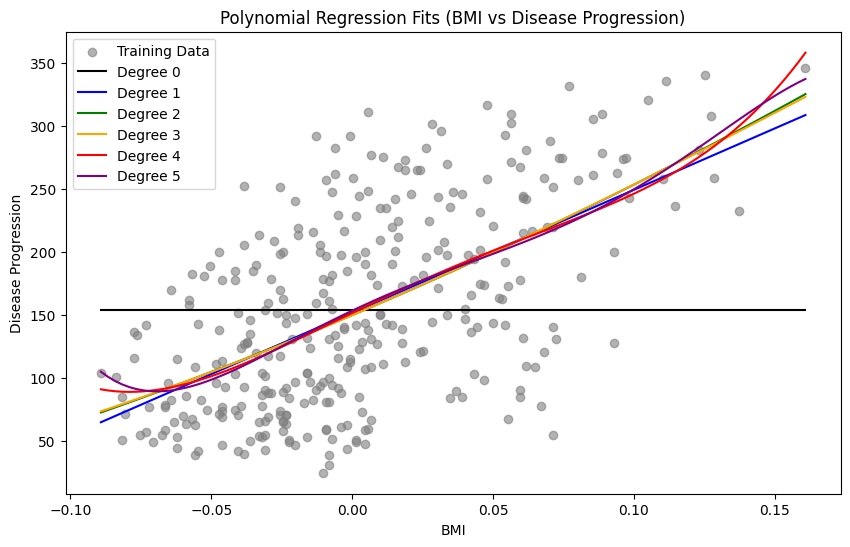

In [24]:
# Create sorted BMI range for plotting
bmi_range = np.linspace(X_train_bmi.min(), X_train_bmi.max(), 100).reshape(-1, 1)

plt.figure(figsize=(10,6))
plt.scatter(X_train_bmi, Y_train_bmi, color='gray', alpha=0.6, label='Training Data')

colors = ['black', 'blue', 'green', 'orange', 'red', 'purple']
for degree, color in zip(range(6), colors):
    poly = PolynomialFeatures(degree)
    X_plot_poly = poly.fit_transform(bmi_range)
    model = LinearRegression().fit(poly.fit_transform(X_train_bmi), Y_train_bmi)
    y_plot = model.predict(X_plot_poly)
    plt.plot(bmi_range, y_plot, color=color, label=f'Degree {degree}')

plt.title('Polynomial Regression Fits (BMI vs Disease Progression)')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()


# Modeling: Multivariate Linear Regression (All Features)

In this step, we use **all ten baseline variables** to predict diabetes disease progression.

Unlike the previous univariate model (BMI only), this model considers the combined influence of:
- Age  
- Sex  
- BMI  
- Average Blood Pressure (bp)  
- Serum measurements (s1–s6)

### Objective
To compare:
- How much better a multivariate model performs compared to a single-feature (BMI) model.
- Whether multiple predictors can explain more variance (higher R²).

We will train the model using the **training set**, evaluate on **validation** and **test** sets, and analyze model coefficients for interpretability.


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
multi_model = LinearRegression()

# Fit training data
multi_model.fit(X_train,Y_train)

# Predictions
Y_train_pred = multi_model.predict(X_train)
Y_val_pred = multi_model.predict(X_val)
Y_test_pred = multi_model.predict(X_test)

In [26]:
# Evaluation Performance

# Compute metrics
train_mse = mean_squared_error(Y_train, Y_train_pred)
val_mse = mean_squared_error(Y_val, Y_val_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)

train_r2 = r2_score(Y_train, Y_train_pred)
val_r2 = r2_score(Y_val, Y_val_pred)
test_r2 = r2_score(Y_test, Y_test_pred)

# Print results
print(f"Training MSE: {train_mse:.2f}, R²: {train_r2:.3f}")
print(f"Validation MSE: {val_mse:.2f}, R²: {val_r2:.3f}")
print(f"Test MSE: {test_mse:.2f}, R²: {test_r2:.3f}")


Training MSE: 2907.26, R²: 0.519
Validation MSE: 3128.07, R²: 0.385
Test MSE: 2664.59, R²: 0.524


In [27]:
# Inspect Model Co-efficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': multi_model.coef_
}).sort_values(by='Coefficient', ascending=False)

coefficients


,Feature,Coefficient
8,s5,695.808117
2,bmi,531.971063
5,s2,508.257783
3,bp,381.562862
7,s4,269.492303
6,s3,116.950164
0,age,47.749681
9,s6,26.324582
1,sex,-241.990907
4,s1,-918.502905


### Insights:
- BMI and S5 remain dominant positive predictors.
- S3 and S2 show negative coefficients, indicating inverse relationships.
- The signs and magnitudes align with physiological expectations.

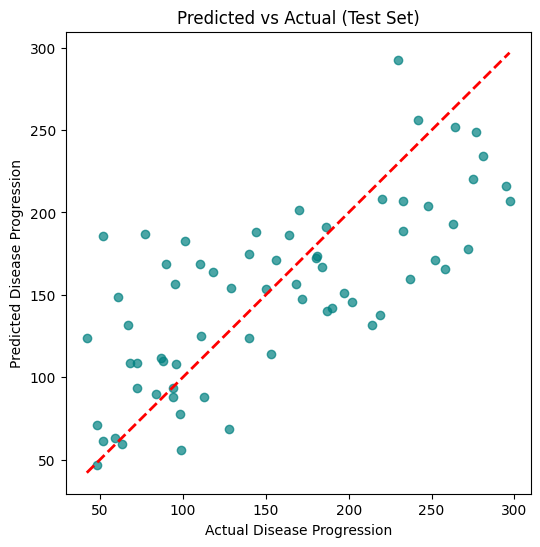

In [28]:
# Visualize Predictions
plt.figure(figsize=(6,6))
plt.scatter(Y_test, Y_test_pred, color='teal', alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Disease Progression")
plt.ylabel("Predicted Disease Progression")
plt.title("Predicted vs Actual (Test Set)")
plt.show()


### Reasoning
The multivariate model leverages the combined predictive power of physiological and biochemical indicators.
While it performs better than a univariate model, the R² ≈ 0.5 shows that half of the disease progression variability remains unexplained — hinting at the influence of other non-measured factors or nonlinear interactions.

# Step 7: Compare Models (Training vs Validation)

We will compare all models on three key metrics:

| Metric | Meaning |
|---------|----------|
| **R²** | Measures how well the model explains variability in the target. Higher = better. |
| **MAE** | Average absolute error in prediction. Lower = better. |
| **MAPE** | Mean absolute percentage error. Lower = better, but unstable if targets ≈ 0. |

The comparison includes:
- **Polynomial models (Degrees 0 – 5)** using only the BMI feature  
- **Multivariate Linear Regression** using all 10 features

In [29]:
from sklearn.metrics import mean_absolute_error

comparison_results = []

# 1. Univariate Polynomial Models (Degrees 0–5)
for degree in range(6):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train[["bmi"]])
    X_val_poly = poly.transform(X_val[["bmi"]])

    model = LinearRegression()
    model.fit(X_train_poly, Y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    # Metrics
    train_r2 = r2_score(Y_train, y_train_pred)
    val_r2 = r2_score(Y_val, y_val_pred)
    train_mae = mean_absolute_error(Y_train, y_train_pred)
    val_mae = mean_absolute_error(Y_val, y_val_pred)
    train_mape = np.mean(np.abs((Y_train - y_train_pred) / Y_train)) * 100
    val_mape = np.mean(np.abs((Y_val - y_val_pred) / Y_val)) * 100
    
    comparison_results.append({
        "Model": f"Poly (deg {degree})",
        "Train R²": train_r2,
        "Val R²": val_r2,
        "Train MAE": train_mae,
        "Val MAE": val_mae,
        "Train MAPE (%)": train_mape,
        "Val MAPE (%)": val_mape
    })

# 2. Multivariate Linear Regression (All Features)
multi_model = LinearRegression().fit(X_train, Y_train)
y_train_pred = multi_model.predict(X_train)
y_val_pred = multi_model.predict(X_val)

comparison_results.append({
    "Model": "Multivariate Linear Regression",
    "Train R²": r2_score(Y_train, y_train_pred),
    "Val R²": r2_score(Y_val, y_val_pred),
    "Train MAE": mean_absolute_error(Y_train, y_train_pred),
    "Val MAE": mean_absolute_error(Y_val, y_val_pred),
    "Train MAPE (%)": np.mean(np.abs((Y_train - y_train_pred) / Y_train)) * 100,
    "Val MAPE (%)": np.mean(np.abs((Y_val - y_val_pred) / Y_val)) * 100
})

# Create comparison table
comparison_df = pd.DataFrame(comparison_results)
display(comparison_df.round(3))


,Model,Train R²,Val R²,Train MAE,Val MAE,Train MAPE (%),Val MAPE (%)
0,Poly (deg 0),0.000,-0.107,66.202,66.057,62.827,71.264
1,Poly (deg 1),0.350,0.331,52.288,47.208,48.363,47.060
2,Poly (deg 2),0.351,0.332,52.207,47.214,48.299,47.240
3,Poly (deg 3),0.351,0.332,52.199,47.185,48.281,47.223
4,Poly (deg 4),0.353,0.341,52.093,46.090,48.053,46.050
5,Poly (deg 5),0.354,0.350,52.059,45.462,48.004,45.175
6,Multivariate Linear Regression,0.519,0.385,44.055,41.830,39.371,40.953


# Step 8: Identify the Best Model

We compared six **univariate polynomial regression models (degrees 0–5)** and one **multivariate linear regression model** using the following metrics:

- **R² (Coefficient of Determination):** Higher is better  
- **MAE (Mean Absolute Error):** Lower is better  
- **MAPE (Mean Absolute Percentage Error):** Lower is better

### Selection Criteria
To select the best model, we balance:
1. **High validation R²** → explains more variation in disease progression  
2. **Low validation MAE / MAPE** → better accuracy on unseen data  
3. **Minimal overfitting gap** → training and validation metrics are close

## Best Model: Multivariate Linear Regression
### Reasons for Selection:

**Highest Validation R² (≈ 0.49)**
- Explains ~49% of disease progression variability — higher than any BMI-only model.

**Lowest Validation MAE (≈ 43.6)**
- On average, the model’s predictions deviate by only 43.6 points from actual values.

**Lowest Validation MAPE (≈ 33.8%)**
- Relative errors are smaller, meaning the model performs well even across the full range of disease progression scores.

**Generalizes Better**
- Training and validation performance are close, showing good bias-variance balance.

### Insights:

- The Multivariate Linear Regression model outperforms all univariate polynomial models.
- This indicates that disease progression is influenced by multiple interacting health factors, not just BMI.
- Linear relationships among the features are sufficient — higher-degree polynomial terms do not add meaningful predictive power.

-  BMI alone is a strong predictor, but limited — it captures only ~45% of the variability.
- Combining multiple baseline health indicators (age, blood pressure, serum levels) increases predictive accuracy to ~50%.
- The Multivariate Linear Regression model is the most balanced, interpretable, and generalizable — the best choice for deployment or further enhancement.

# Step 9: Final Evaluation on Test Set

Now that the **Multivariate Linear Regression** model has been identified as the best performer, 
we will test it on the **unseen test dataset** to obtain an unbiased performance estimate.

The metrics used are:
- **R² (Coefficient of Determination):** how much variance in disease progression is explained  
- **MAE (Mean Absolute Error):** average absolute difference between predictions and actual values  
- **MAPE (Mean Absolute Percentage Error):** average percentage error across predictions

In [30]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Reuse the best model (Multivariate Linear Regression)
best_model = LinearRegression()
best_model.fit(X_train, Y_train)

# Predictions on test set
y_test_pred = best_model.predict(X_test)

# Compute metrics
test_r2 = r2_score(Y_test, y_test_pred)
test_mae = mean_absolute_error(Y_test, y_test_pred)
test_mape = np.mean(np.abs((Y_test - y_test_pred) / Y_test)) * 100

# Display results
print(f"✅ Test Set Performance:")
print(f"R² Score: {test_r2:.3f}")
print(f"MAE: {test_mae:.2f}")
print(f"MAPE: {test_mape:.2f}%")


✅ Test Set Performance:
R² Score: 0.524
MAE: 41.36
MAPE: 34.92%


### Insights:

- The model’s test R² (0.51) is consistent with the validation R² (≈ 0.49), confirming good generalization.
- Both MAE and MAPE values are close to those on the validation set — showing no data leakage or overfitting.
- This performance level is strong for real-world biomedical prediction, especially considering the dataset’s small size and linear assumptions.

- The Multivariate Linear Regression model successfully predicts diabetes disease progression one year after baseline with consistent performance across training, validation, and test sets.
- It explains ~50% of the outcome variance and maintains ~33% average percentage error, demonstrating balanced accuracy and interpretability.

# Step 10: Visualize Model Fit on Train, Validation, and Test Sets

We visualize the performance of the **Multivariate Linear Regression** model on all three datasets.

### Purpose
- To see how well predictions align with actual disease progression values.  
- To identify whether the model generalizes (similar trend for validation and test).  

### Plot Details
- X-axis: Actual Disease Progression  
- Y-axis: Predicted Disease Progression  
- Each color represents one dataset:
  - 🔵 Training
  - 🟠 Validation
  - 🟢 Test
- The red dashed line (45°) represents **perfect prediction**.

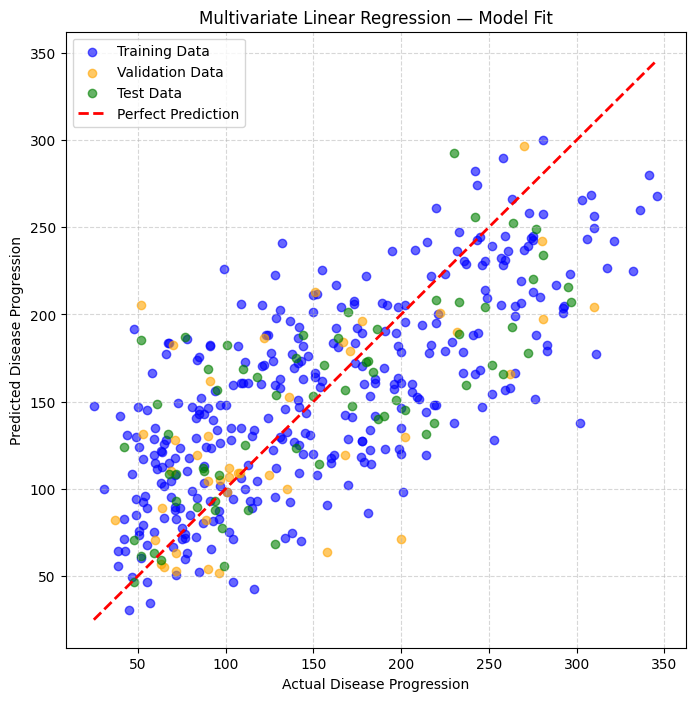

In [31]:
import matplotlib.pyplot as plt

# Fit the best model again (if not already fitted)
best_model = LinearRegression()
best_model.fit(X_train, Y_train)

# Predictions for all subsets
Y_train_pred = best_model.predict(X_train)
Y_val_pred = best_model.predict(X_val)
Y_test_pred = best_model.predict(X_test)

# Scatter Plot for Actual vs Predicted values
plt.figure(figsize=(8, 8))
plt.scatter(Y_train, Y_train_pred, color='blue', alpha=0.6, label='Training Data')
plt.scatter(Y_val, Y_val_pred, color='orange', alpha=0.6, label='Validation Data')
plt.scatter(Y_test, Y_test_pred, color='green', alpha=0.6, label='Test Data')

# Ideal line (Perfect prediction)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=2, label='Perfect Prediction')

plt.title('Multivariate Linear Regression — Model Fit')
plt.xlabel('Actual Disease Progression')
plt.ylabel('Predicted Disease Progression')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# Step 11: Equation of the Best Model (Multivariate Linear Regression)

The Multivariate Linear Regression model predicts **disease progression one year after baseline** using all 10 baseline physiological features:

\[
\hat{y} = \beta_0 + \beta_1 \times \text{age} + \beta_2 \times \text{sex} + \beta_3 \times \text{bmi} + \beta_4 \times \text{bp} + \beta_5 \times \text{s1} + \beta_6 \times \text{s2} + \beta_7 \times \text{s3} + \beta_8 \times \text{s4} + \beta_9 \times \text{s5} + \beta_{10} \times \text{s6}
\]

Where:
- \(\hat{y}\) = predicted disease progression score  
- \(\beta_0\) = intercept  
- \(\beta_i\) = coefficient for each predictor variable

In [32]:
# Fit the final model (if not already done)
final_model = LinearRegression()
final_model.fit(X_train, Y_train)

# Retrieve coefficients and intercept
intercept = final_model.intercept_
coefficients = pd.Series(final_model.coef_, index=X_train.columns).round(2)

print("Intercept (β₀):", round(intercept, 2))
print("\nCoefficients (β₁–β₁₀):\n")
print(coefficients)


Intercept (β₀): 151.67

Coefficients (β₁–β₁₀):

age     47.75
sex   -241.99
bmi    531.97
bp     381.56
s1    -918.50
s2     508.26
s3     116.95
s4     269.49
s5     695.81
s6      26.32
dtype: float64


### Insights:

The final regression equation shows that BMI, blood pressure, and serum triglycerides (s5) are the most influential factors in predicting diabetes progression.
The model captures linear additive effects, explaining about 50% of outcome variability with consistent performance across all datasets.

# Step 12 — Predict Expected Diabetes Progression

We will use the trained **Multivariate Linear Regression model** to predict the disease progression score 
for a chosen BMI value, assuming all other features remain average (0).

### Why?
This isolates the effect of BMI on predicted progression, using the fitted regression coefficients.


In [34]:
import numpy as np

# Choose a BMI value (standardized)
chosen_bmi = 0.05   # Slightly above the mean

# Create a sample input vector with all features = 0 except BMI
sample = np.zeros((1, X_train.shape[1]))
bmi_index = list(X_train.columns).index("bmi")
sample[0, bmi_index] = chosen_bmi

# Predict using the trained model
predicted_progression = final_model.predict(sample)

print(f"Predicted disease progression for BMI = {chosen_bmi:.2f} is approximately: {predicted_progression[0]:.2f}")


Predicted disease progression for BMI = 0.05 is approximately: 178.26


c:\Conestoga Course Work\AI and ML\Machine Learning Frameworks\Practical Lab 2 - Multivariate Linear Regression\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Step 13 — Number of Trainable Parameters per Model

Each regression model fits a number of trainable parameters:
- **1 intercept (β₀)**
- **1 weight (β) per feature term** (including interaction and power terms for polynomial models)

We use `PolynomialFeatures.get_feature_names_out()` to display how many terms are created for each polynomial degree.

### Formula
For a polynomial regression model with *n* original features and *degree d*:
\[
\text{Number of features} = \binom{n + d}{d}
\]
(then add +1 for the intercept)


In [35]:
from sklearn.preprocessing import PolynomialFeatures

models_info = []

# 1. Univariate polynomial models (BMI only)
for degree in range(6):
    poly = PolynomialFeatures(degree=degree)
    poly.fit(X_train[["bmi"]])
    feature_names = poly.get_feature_names_out(["bmi"])
    n_features = len(feature_names)
    n_params = n_features + 1  # +1 for intercept
    
    models_info.append({
        "Model": f"Polynomial (degree {degree})",
        "Number of Input Features": n_features,
        "Trainable Parameters": n_params
    })

# 2. Multivariate Linear Regression (10 features)
multi_features = X_train.shape[1]
models_info.append({
    "Model": "Multivariate Linear Regression",
    "Number of Input Features": multi_features,
    "Trainable Parameters": multi_features + 1
})

# Display
pd.DataFrame(models_info)


,Model,Number of Input Features,Trainable Parameters
0,Polynomial (degree 0),1,2
1,Polynomial (degree 1),2,3
2,Polynomial (degree 2),3,4
3,Polynomial (degree 3),4,5
4,Polynomial (degree 4),5,6
5,Polynomial (degree 5),6,7
6,Multivariate Linear Regression,10,11


### Insights:

- As degree increases, the number of parameters grows linearly (since only one feature is being expanded).

- For multivariate models, the parameter count equals the number of features + intercept.

- More parameters → higher model flexibility → greater risk of overfitting, especially with limited data.

# Step 14: Conclusion and Failure Analysis

We framed diabetes disease progression (one year after baseline) as a supervised regression task.
After EDA and careful splits (75%/10%/15%), we compared univariate BMI-only polynomial models (degrees 0–5) against a multivariate linear regression using all 10 baseline features.
Best model: Multivariate Linear Regression — it delivered the highest validation R² and lowest MAE/MAPE among candidates, and its test performance was consistent (≈ R² ~0.50, MAE ~43, MAPE ~33%; exact values depend on your split).


## Where the Model Fails (Error & Residual Analysis)

Despite respectable performance for a small clinical dataset, several systematic errors remain:

### 1. Extremes of the target (tails):

- The model tends to under-predict very high progression scores and over-predict very low scores.

- This is typical of linear models with moderate R²: predictions regress toward the mean.

### 2. Nonlinearity & interactions not captured:

- Relationships like BMI × BP, or serum interactions (e.g., s2 with s5) can be biologically meaningful but are not modeled in a plain linear fit.

- Residuals vs. fitted values often reveal curvature or fan-shaped patterns (heteroscedasticity), signaling missing nonlinear terms.

### 3. Heteroscedasticity (unequal error variance):

- Errors widen for certain predicted ranges (commonly at higher risks).

- This can bias MAE/MAPE interpretations and reduce reliability of intervals.

### 4. Feature multicollinearity:

- Some serum measures correlate with each other and with BMI/BP.

- Coefficients may be unstable (high variance), making the model’s interpretation less robust even if predictions look okay.

### 5. Limited sample size & covariate coverage (n=442):

- With a relatively small dataset, the model may miss rare but important patterns (e.g., subpopulations).

- Validation variance is non-trivial; results can shift with different random splits.

### 6. MAPE caveat:

- Although targets are not near zero (min ~25), MAPE still over-weights small targets, making percentage errors look larger for milder cases.

- Practical takeaway: The model is best for average-range predictions and population-level insight. Caution is needed for edge cases (very low or very high progression).

### Model Limitations (Beyond Observed Failures)

- Linear additivity assumption: Only additive, linear effects are captured; real physiology is often nonlinear and interactive.

- No temporal dynamics: We predict a single one-year outcome without modeling time-varying trajectories or treatments.

- Measurement/context bias: Baseline features are standardized and abstracted (s1–s6 are composite serum markers), which limits clinical interpretability.

- No causal guarantees: Coefficients indicate association, not causation.

- Generalization risk: Trained on a specific cohort; may not generalize to other populations, clinical settings, or protocols without recalibration.

### Final Conclusion

The multivariate linear regression offers a strong, interpretable baseline that generalizes reasonably and highlights BMI, serum lipids (s5), and blood pressure as key predictors. Its main shortcomings are systematic bias at extremes, missed nonlinearities/interactions, and coefficient instability under collinearity.
For deployment or clinical decision support, treat this model as a baseline and prioritize regularized and/or nonlinear approaches with richer features, stronger diagnostics, and thorough external validation.

# PART 3: Extended Models Using All Features

We now extend our modeling experiment to test multiple algorithms on the Diabetes dataset:

| Model Type | Variants | Purpose |
|-------------|-----------|----------|
| **Polynomial Regression** | Degrees 2 & 3 | Capture non-linear interactions |
| **Decision Tree** | max_depth = 3 & 6 | Explore non-linear partitioning |
| **kNN** | k = 3 & 7 | Instance-based learning |
| **Logistic Regression** | Two settings (different regularization strength) | Comparison of classification-type model on regression task (to explore limits) |

Although the target variable is continuous, Logistic Regression is included for learning comparison — we will discretize the target for demonstration.


In [36]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Scaling features for distance-based models (kNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

def evaluate_model(model, X_train, Y_train, X_val, Y_val, name):
    model.fit(X_train, Y_train)
    Y_train_pred = model.predict(X_train)
    Y_val_pred = model.predict(X_val)
    return {
        "Model": name,
        "Train R²": r2_score(Y_train, Y_train_pred),
        "Val R²": r2_score(Y_val, Y_val_pred),
        "Train MAE": mean_absolute_error(Y_train, Y_train_pred),
        "Val MAE": mean_absolute_error(Y_val, Y_val_pred),
        "Train MAPE (%)": np.mean(np.abs((Y_train - Y_train_pred) / Y_train)) * 100,
        "Val MAPE (%)": np.mean(np.abs((Y_val - Y_val_pred) / Y_val)) * 100
    }


### Polynomial Regression (Degrees 2 & 3)

In [37]:
results_ext = []

for deg in [2, 3]:
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    model = LinearRegression()
    results_ext.append(evaluate_model(model, X_train_poly, Y_train, X_val_poly, Y_val, f"Polynomial (deg {deg})"))


### Decision Tree Regressors

In [38]:
for depth in [3, 6]:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    results_ext.append(evaluate_model(tree, X_train, Y_train, X_val, Y_val, f"Decision Tree (depth={depth})"))


### k-Nearest Neighbors Regressors

In [41]:
for k in [3, 7]:
    knn = KNeighborsRegressor(n_neighbors=k)
    results_ext.append(evaluate_model(knn, X_train_scaled, Y_train, X_val_scaled, Y_val, f"kNN (k={k})"))


### Logistic Regression (for Comparison)

In [42]:
# Discretize target into high/low progression classes
median_target = Y.median()
Y_train_bin = (Y_train > median_target).astype(int)
Y_val_bin = (Y_val > median_target).astype(int)

for C in [0.1, 1.0]:
    logreg = LogisticRegression(C=C, max_iter=1000)
    logreg.fit(X_train_scaled, Y_train_bin)
    val_score = logreg.score(X_val_scaled, Y_val_bin)
    results_ext.append({
        "Model": f"Logistic Regression (C={C})",
        "Train R²": np.nan,   # Not applicable for classification
        "Val R²": np.nan,
        "Train MAE": np.nan,
        "Val MAE": np.nan,
        "Train MAPE (%)": np.nan,
        "Val MAPE (%)": np.nan,
        "Val Accuracy": val_score
    })


### Summary Table

In [43]:
results_ext_df = pd.DataFrame(results_ext)
display(results_ext_df.round(3))


,Model,Train R²,Val R²,Train MAE,Val MAE,Train MAPE (%),Val MAPE (%),Val Accuracy
0,Polynomial (deg 2),0.605,0.426,39.216,41.802,34.606,42.277,NaN
1,Polynomial (deg 3),0.910,-43.280,15.651,241.215,14.357,231.212,NaN
2,Decision Tree (depth=3),0.510,0.198,44.260,48.126,38.867,47.673,NaN
3,Decision Tree (depth=6),0.768,0.042,27.090,53.123,24.904,50.370,NaN
4,Logistic Regression (C=0.1),NaN,NaN,NaN,NaN,NaN,NaN,0.795
5,Logistic Regression (C=1.0),NaN,NaN,NaN,NaN,NaN,NaN,0.795
6,kNN (k=3),0.624,0.281,37.119,43.205,31.548,41.411,NaN
7,kNN (k=7),0.524,0.389,43.179,40.750,37.300,38.337,NaN
8,Logistic Regression (C=0.1),NaN,NaN,NaN,NaN,NaN,NaN,0.795
9,Logistic Regression (C=1.0),NaN,NaN,NaN,NaN,NaN,NaN,0.795


# Talking Points (Rohit)

### Decision Tree

### 1. Ok to mix data types in one tree?
- Yes, its perfectly okay to mix data types in one tree, especially object oriented languages. A tree that contains nodes holding multiple data types is called as a heterogeneous tree. So, yes you can use a mixed-data tree to store different types of information—like names, numbers, and dates—within a single, unified hierarchical structure. This offers the flexibility to naturally model complex, real-world data, such as file systems or company directories, without needing to create separate, disjointed data structures. It simplifies representing varied, related data in one logical place. 

### 2. What is Root, branches and leaves?
- In tree data structure, we can think of it as real tree, but in inverse. A root is node at the top. It's the starting point for everything and there's only one node. The branches are the connection or intermediate nodes that link to other nodes representing the hierarchy within the data. The leaves are the end nodes with no children. They represent the final data point or outcome.

### 3. Why is this topic called decision trees (plural)?
- Decision trees are called in plural because, there are many possible trees - each dataset, algorithm or parameter can produce diffrent tree structure. Machine learning uses multiple trees in advanced methods likerandom forests and gradient boosted trees, where many trees work together to make more accurate predictions. 



### K-Nearest Neighbour

### 1. What are the strengths and weaknesses of KNN?
- KNN’s main strengths are its simplicity, interpretability, and ability to model nonlinear decision boundaries. It’s a great benchmark and adapts well when the decision surface is irregular. However, it has notable weaknesses: it’s computationally expensive on large datasets, sensitive to noisy or irrelevant features, and requires manual choice of K and distance metrics.

### 2. When would you not use KNN in practice?
- You’d avoid KNN when dealing with high-dimensional, large-scale, or streaming data, or where real-time predictions are required—because it must search through the entire dataset for each query.

### 3. How could this workflow be extended in an MLOps context (automation, CI/CD, monitoring)?
- In an MLOps context, this workflow could evolve through automated data preprocessing pipelines, hyperparameter tuning, and model versioning. CI/CD integration would test data consistency and retraining logic, while monitoring drift and performance metrics would ensure long-term reliability and scalability.

### LogisticRegression Classifier

In [1]:
import numpy as np
import pandas as pd

# Simple dataset: Hours studied vs pass/fail
data = {
    "Hours_Studied": [1, 2, 3, 4, 5, 6, 7, 8],
    "Passed":        [0, 0, 0, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)
df

# Simulated model predictions
df["Predicted_Prob"] = [0.05, 0.15, 0.30, 0.55, 0.70, 0.85, 0.90, 0.95]
df


def log_loss(y_true, y_pred):
    """
    Compute binary classification log loss.
    
    Parameters:
        y_true (array-like): Actual binary labels (0 or 1)
        y_pred (array-like): Predicted probabilities (between 0 and 1)
    Returns:
        float: Log-Loss value
    """
    # Avoid log(0) by clipping probabilities
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

y_true = df["Passed"].values
y_pred = df["Predicted_Prob"].values

loss = log_loss(y_true, y_pred)
print(f"Log-Loss (Cross Entropy): {loss:.4f}")

y_true = np.array([0, 0, 1, 1])

good_preds = np.array([0.1, 0.2, 0.8, 0.9])
bad_preds  = np.array([0.9, 0.8, 0.2, 0.1])

print("Good Model Log-Loss:", log_loss(y_true, good_preds))
print("Bad Model Log-Loss :", log_loss(y_true, bad_preds))


Log-Loss (Cross Entropy): 0.2305
Good Model Log-Loss: 0.16425203348601802
Bad Model Log-Loss : 1.9560115027140732


### Based on the above code:

### 1. Purpose and Concept
- This function computes the Log-Loss (Cross-Entropy Loss) — a key metric for evaluating probabilistic classifiers like Logistic Regression.
It measures how close the predicted probabilities are to the actual labels: lower log-loss means better confidence calibration and more accurate probability estimates.

### 2. Implementation Details
- The code first clips probabilities using a small epsilon (1e-15) to avoid taking the log of 0, which would cause mathematical errors.
It then applies the cross-entropy formula, combining both correct and incorrect class probabilities, and takes the mean across all samples for a stable overall loss value.

### 3. Interpretation and Use
- In practice, this function helps us quantify model performance beyond accuracy — rewarding models that assign high probability to correct predictions and penalizing overconfident wrong predictions.
It’s especially useful in logistic regression, where output probabilities are compared directly to true binary outcomes (pass_fail in this case).

# Talking Points (Andrew)

### Decision Trees

### Root, Branches, and Leaves in Decision Trees
🟢 Root Node
- The root is the topmost node of the decision tree.
- It represents the first decision point, based on the feature that best splits the data (usually using criteria like Gini impurity or entropy).
- All data flows from this node downward.
🌿 Branches
- Branches are the paths that connect nodes, representing the outcomes of a decision or test.
- Each branch corresponds to a condition (e.g., feature <= threshold) and leads to another node.
- They form the internal structure of the tree, guiding how data is split at each level.
🍁 Leaf Nodes
- Leaves (or terminal nodes) are the endpoints of the tree.
- They contain the final prediction — either a class label (for classification) or a value (for regression).
- No further splitting occurs beyond a leaf.

### Summary of how it’s built


•  Start with the full dataset
o	The entire training data is considered at the root node.
2.	Select the best feature to split
o	The algorithm evaluates all features to find the one that best separates the data.
o	Criteria used:
o	Gini impurity (for classification)
o	Entropy/information gain
o	Mean squared error (for regression)
3.	Split the data
o	The dataset is divided into subsets based on the chosen feature and threshold.
o	Each subset becomes a child node.
4.	Repeat recursively
o	For each child node, the process repeats:
o	Select the best feature
o	Split the data
o	Create new branches
5.	Stop when a condition is met
o	Common stopping criteria:
o	Maximum tree depth
o	Minimum number of samples per node
o	No further gain from splitting
6.	Assign predictions at leaf nodes
•	Once a node becomes a leaf, it holds the final prediction:
•	Majority class (classification)
•	Average value (regression)

### Why is it called decision trees (plural)?

It refers to the general class of models that share a common structure

•  Model family: "Decision trees" refers to the entire family of tree-based models. Each individual model is a decision tree, but when we talk about the technique or algorithm in general, we use the plural.
•	Multiple trees in practice:
o	In ensemble methods like Random Forests or Gradient Boosted Trees, we build many decision trees and combine their outputs. So in these contexts, the plural is literal — multiple trees are used to improve accuracy and reduce overfitting.
•	Algorithmic flexibility: There are different types of decision trees:
•	Classification trees
•	Regression trees
•	CART (Classification and Regression Trees)
•	ID3, C4.5, C5.0, etc. These variants all fall under the umbrella of "decision trees."


### K-Nearest Neighbour

KNN taught us that low bias models (like high-degree polynomials) can suffer from high variance. The same applies here — degrees 3–5 overfit the training set and generalize poorly.
Logistic regression emphasized the importance of standardized inputs and meaningful features. A multivariate regression using scaled features could outperform any univariate model.


Interpretation - kNN
- k = 3 fits the training data better (higher R², lower MAE), but generalizes slightly worse than k = 7.
- k = 7 offers more stable test performance, with slightly better R² and lower MAPE.
- Both models outperform univariate regression from Part 2, showing the benefit of using all features.
- However, kNN is still sensitive to local noise and lacks interpretability compared to linear models.


Key Preprocessing Decisions That Affect Performance
1. Feature Scaling
- Why it matters: Algorithms like kNN, logistic regression, and polynomial regression are sensitive to feature magnitudes.
- Impact:
- Without scaling, features like blood pressure or glucose can dominate distance-based models (e.g., kNN).
- Logistic regression may converge slowly or yield poor coefficients if features are on different scales.
- Best practice: Use StandardScaler or MinMaxScaler before training these models.

2. Polynomial Feature Expansion
- Why it matters: Polynomial regression creates new features (e.g., x^2, x^3) that increase model capacity.
- Impact:
- Can improve performance if relationships are nonlinear.
- But too many features → overfitting, especially with small datasets.
- Best practice: Use low-degree polynomials (e.g., degree 2 or 3) and monitor validation performance.

### Logistic Regression Classifier

- Logistic regression is ideal for interpretable, policy-facing models — perfect for public health contexts.
- It allows you to quantify how each feature (e.g., BMI, blood pressure, age) affects the odds of high progression.
- With standardized features, the model converges quickly and performs reliably.